In [1]:
%matplotlib inline
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorpack.dataflow.common import MapData, BatchData
from tensorpack.dataflow.parallel import PrefetchData

sys.path.append('..')

from training.dataflow import CocoDataFlow, JointsLoader
from training.dataset import read_img, gen_mask, augment, apply_mask, \
    create_all_mask, ALL_HEATMAP_MASK, ALL_PAF_MASK, build_sample, batch_dataflow
from training.label_maps import create_heatmap, create_paf
from training.train_pose import gen

/home/han/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
batch_size = 1

# annot_path = '../dataset/annotations/person_keypoints_val2017.json'
# img_dir = '../dataset/val2017/'
annot_path='/media/han/E/mWork/datasets/COCO2017/annotations/person_keypoints_val2017.json'
img_dir='/media/han/E/mWork/datasets/COCO2017/val2017/'
df = CocoDataFlow((368, 368), annot_path, img_dir)#,select_ids=[1000])
df.prepare()
df = MapData(df, read_img)
df = MapData(df, gen_mask)
df = MapData(df, augment)
df = MapData(df, apply_mask)
df = MapData(df, build_sample)
df = PrefetchData(df, nr_prefetch=1, nr_proc=1)

g = gen(batch_dataflow(df, batch_size))

loading annotations into memory...
Done (t=0.21s)
creating index...
index created!
Loading image annot 0/5000
Loading image annot 2000/5000
Loading image annot 4000/5000
[0912 12:22:03 @argtools.py:152] WRN Install python-prctl so that processes can be cleaned with guarantee.


In [17]:
x,y = next(g)   #len(x)=3,len(y)=12 为什么会有12个，经测试，发现是重复的

print('Shapes')
print(x[0].shape) #原图resize后图像，也是网络输入图像
print(x[1].shape) 
print(x[2].shape) 
print('----')
print(y[0].shape) #paf
print(y[1].shape) #heatmap
print(y[2].shape)
print(y[3].shape)
print(y[4].shape)
print(y[5].shape)
print(y[6].shape)
print(y[7].shape)
print(y[8].shape)
print(y[9].shape)
print(y[10].shape)
print(y[11].shape)
print('Types')
print(x[0].dtype)
print(x[1].dtype)
print(x[2].dtype)
print('----')
print(y[0].dtype)
print(y[1].dtype)
print(y[2].dtype)
print(y[3].dtype)
print(y[4].dtype)
print(y[5].dtype)
print(y[6].dtype)
print(y[7].dtype)
print(y[8].dtype)
print(y[9].dtype)
print(y[10].dtype)
print(y[11].dtype)

Shapes
(1, 368, 368, 3)
(1, 46, 46, 38)
(1, 46, 46, 19)
----
(1, 46, 46, 38)
(1, 46, 46, 19)
(1, 46, 46, 38)
(1, 46, 46, 19)
(1, 46, 46, 38)
(1, 46, 46, 19)
(1, 46, 46, 38)
(1, 46, 46, 19)
(1, 46, 46, 38)
(1, 46, 46, 19)
(1, 46, 46, 38)
(1, 46, 46, 19)
Types
uint8
uint8
uint8
----
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [22]:
x,y=next(g)

In [82]:
np.max(y[0]-y[2])

0.0

## Image + mask

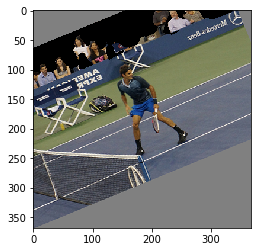

In [73]:
img = x[0][0,...]  #x[0][0,...] 等效于 x[0][0,:]
mask_paf = x[1][0,...] #都是1
mask_heatmap = x[2][0,...] #都是1
pafmap = y[4][0,...]
heatmap = y[5][0,...]
plt.imshow(img[:,:,[2,1,0]])

## Mask

0.0
0.9867312278326272
float64


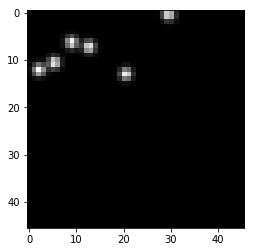

In [24]:
mask_img=heatmap[:,:,0] 
plt.imshow(mask_img * 255, cmap='gray') #mask_img中的元素都是0，或者1
import numpy as np
print (np.min(mask_img))
print (np.max(mask_img))
print (mask_img.dtype)

## Heatmap

(368, 368)
float64
1.0
0.0


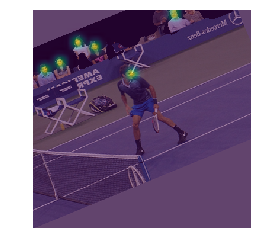

In [74]:
body_part = 0

#resize x,y轴扩大8倍,注意参数中第二个应该表示resize后的大小，但是为（0,0）的话说明使用scale因子
heatmap1 = cv2.resize(heatmap[:, :, body_part], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)

print(heatmap1.shape)
# plt.figure(figsize=(16,8))
plt.imshow(img[:,:,[2,1,0]])
plt.imshow(heatmap1[:,:], alpha=.5) #如果两幅图像大小不一致，则直接融合有问题
plt.axis('off')
plt.savefig("../result_imgs/heatmap.png",transparent=True,bbox_inches='tight',dpi=300)

print (heatmap.dtype)
print (np.max(heatmap))
print (np.min(heatmap))

## PAF dx

float64
0.8591490272177846
-0.15720554246091517


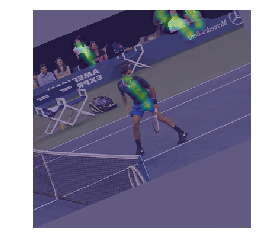

In [75]:
paf_num = 6

pafmap1 = cv2.resize(pafmap[:, :, paf_num], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)

plt.imshow(img[:,:,[2,1,0]])
plt.imshow(pafmap1, alpha=.5)

plt.axis('off')
plt.savefig("../result_imgs/paf_dx.png",transparent=True,bbox_inches='tight',dpi=300)

print (pafmap1.dtype)
print (np.max(pafmap1))
print (np.min(pafmap1))

## PAF dy

float64
1.122664416585789
-0.2033613886659655


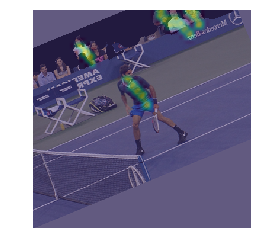

In [76]:
paf_num = 7

pafmap2 = cv2.resize(pafmap[:, :, paf_num], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)

plt.imshow(img[:,:,[2,1,0]])
plt.imshow(pafmap2, alpha=.5)
plt.axis('off')
plt.savefig("../result_imgs/paf_dy.png",transparent=True,bbox_inches='tight',dpi=300)

print (pafmap2.dtype)
print (np.max(pafmap2))
print (np.min(pafmap2))

## PAF vectors

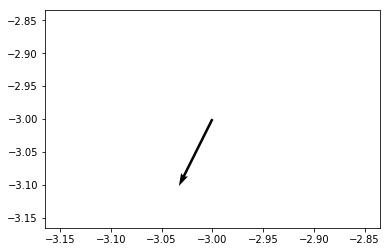

In [77]:
X = np.arange(-3, 3, 1)
Y = np.arange(-3, 3, 1)
U, V = np.meshgrid(X, Y)
q = plt.quiver(X[0], Y[0], -1, -2,scale=10)
plt.show()

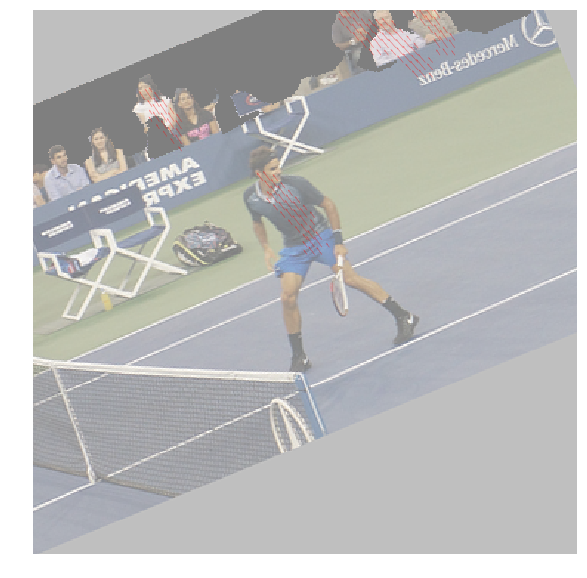

In [78]:
from numpy import ma

paf_num1 = 6
paf_num2 = 7

U = cv2.resize(pafmap[:,:,paf_num1], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC) * -1
V = cv2.resize(pafmap[:,:,paf_num2], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
X, Y = np.meshgrid(np.arange(U.shape[1]), np.arange(U.shape[0]))
M = np.zeros(U.shape, dtype='bool')
M[U**2 + V**2 < 0.5 * 0.5] = True # 将满足条件的区域设置为mask,也就是屏蔽这些位置的元素。
U = ma.masked_array(U, mask=M) #U只剩下关键点paf值较大的区域，在这个区域画箭头
V = ma.masked_array(V, mask=M)

plt.figure()
plt.imshow(img[:,:,[2,1,0]], alpha = .5)
s = 5
# 从(X,Y)点开始画箭头，方向为（U,V）,scale越小，箭头长度越长
Q = plt.quiver(X[::s,::s], Y[::s,::s], U[::s,::s], V[::s,::s], 
               scale=50, headaxislength=4, alpha=.5, width=0.001, color='r')
plt.axis('off')
plt.savefig("../result_imgs/paf_vector.png",transparent=True,bbox_inches='tight',dpi=300)
fig = plt.gcf()
fig.set_size_inches(10, 10)